we will use 3 AutoML libraries (H2o, Flaml, Lazy Classifier)

In [1]:
!pip install flaml
!pip install h2o
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.6/680.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 11.2 MB/s eta 0:00:00


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import h2o
from h2o.automl import H2OAutoML
from flaml import AutoML
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from tpot import TPOTClassifier


# Read & Explore The Dataset

In [3]:
df= pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Our Target Column Is diagnosis:  where M - Malignant , B - Benign**

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


# Check Missings & Duplicates

In [8]:
df.isnull().sum().sort_values(ascending=False)

id                         0
diagnosis                  0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
fractal_dimension_worst    0
dtype: int64

**The Data Is Clean**

# EDA

**Check The Balance of Target Column (Diagnosis)**

In [9]:
target_counts=df["diagnosis"].value_counts()

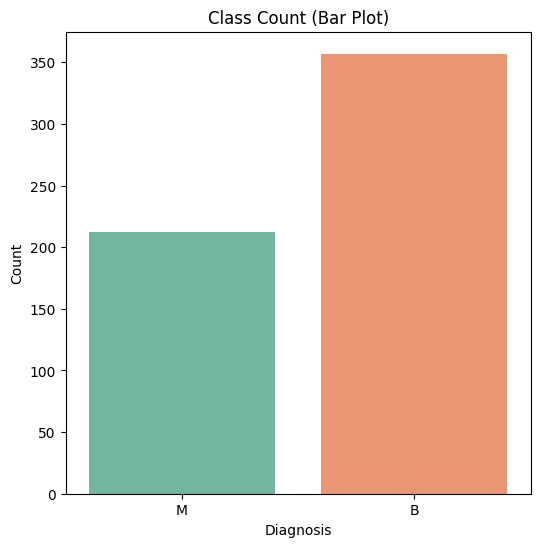

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title('Class Count (Bar Plot)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

**No class imbalance detected in the target column.**

**The data is relatively balanced, so no resampling techniques are needed.**

**Pairwise Feature Relationships by Diagnosis**

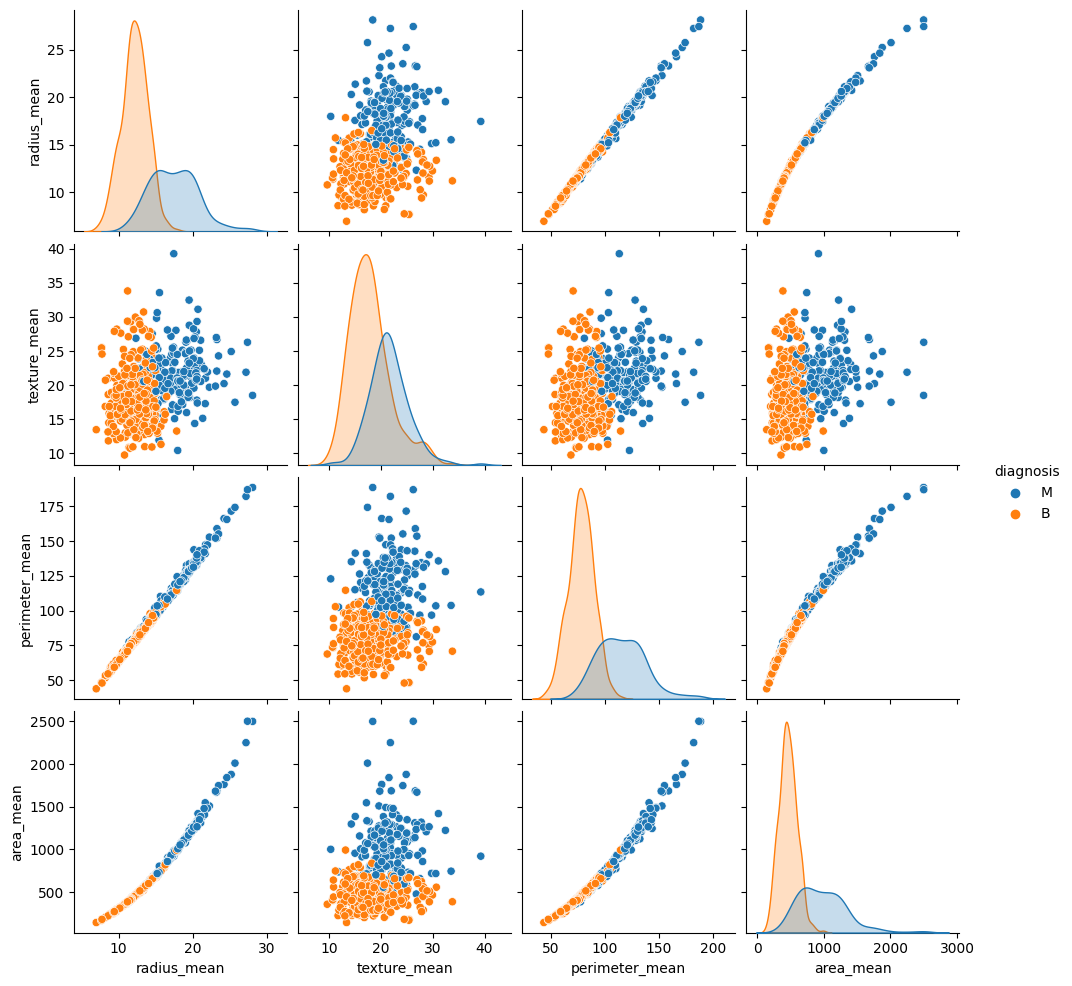

In [11]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis')
plt.show()


**Diagnosis Label Proportion and Radius Mean Comparison**

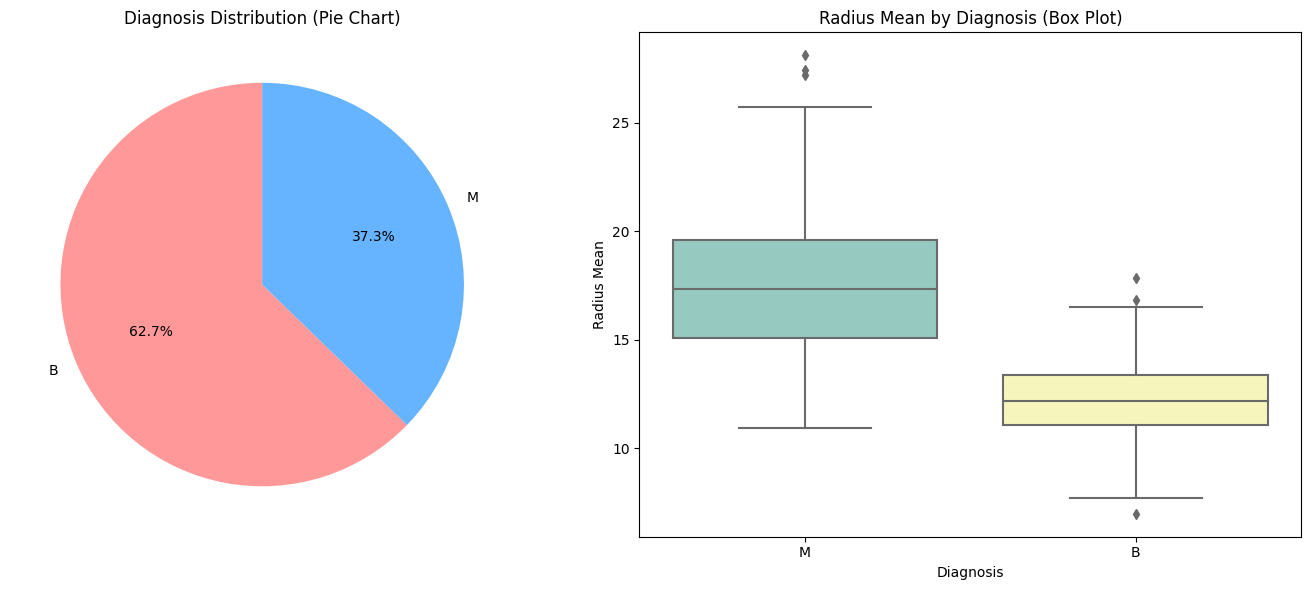

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

diagnosis_counts = df['diagnosis'].value_counts()
axes[0].pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_title('Diagnosis Distribution (Pie Chart)')

sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette='Set3', ax=axes[1])
axes[1].set_title('Radius Mean by Diagnosis (Box Plot)')
axes[1].set_xlabel('Diagnosis')
axes[1].set_ylabel('Radius Mean')

plt.tight_layout()
plt.show()


In [13]:
data = df.copy()
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)



In [14]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# H2o

In [15]:
h2o.init()

train_h2o = h2o.H2OFrame(X_train.assign(diagnosis=y_train))
test_h2o = h2o.H2OFrame(X_test.assign(diagnosis=y_test))

x = X_train.columns.tolist()
y = 'diagnosis'

train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train_h2o)

lb = aml.leaderboard
print(lb)

preds = aml.leader.predict(test_h2o)
preds_df = preds.as_data_frame()['predict']
acc = accuracy_score(y_test, preds_df.astype(int))
print(f"\n✅ H2O AutoML Accuracy on Test Set: {acc:.4f}")


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpuxlfq2f_
  JVM stdout: /tmp/tmpuxlfq2f_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpuxlfq2f_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_x6md26
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GLM_1_AutoML_1_20250806_81637                           0.994455  0.0809325  0.993334               0.0229962  0.143677  0.0206432
GBM_2_AutoML_1_20250806_81637                           0.994021  0.0951966  0.991272               0.0383271  0.163067  0.0265909
GBM_3_AutoML_1_20250806_81637                           0.993566  0.0943829  0.991061               0.0359064  0.160448  0.0257434
StackedEnsemble_BestOfFamily_1_AutoML_1_20250806_81637  0.993059  0.081598   0.992262               0.0188273  0.140499  0.0197399
GBM_1_AutoML_1_20250806_81637                           0.99

# Flaml

In [16]:
automl = AutoML()

settings = {
    "time_budget": 60,
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "flaml.log",
    "verbose": 0,
}
automl.fit(X_train=X_train, y_train=y_train, **settings)

print("✅ Best model found by FLAML:", automl.model.estimator)

y_pred = automl.predict(X_test)

acc = accuracy_score(y_test, y_pred)

✅ Best model found by FLAML: LGBMClassifier(learning_rate=1.0, max_bin=1023, min_child_samples=7,
               n_estimators=8, n_jobs=-1, num_leaves=8, reg_alpha=0.0009765625,
               reg_lambda=1.3799708089658163, verbose=-1)


# Lazy Classifier

In [17]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=accuracy_score)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.98               0.98     0.98      0.98   
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
Perceptron                         0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.97               0.97     0.97      0.97   
LogisticRegression                 0.97               0.97     0.97      0.97   
SGDClassifier                      0.96               0.97     0.97      0.97   
ExtraTreeClassifier                0.96               0.97     0.97      0.97   
CalibratedClassifierCV             0.97               0.97     0.97      0.97   
RandomForestClassifier             0.96               0.96     0.96      0.96   
LGBMClassifier              